In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd

In [3]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()

········


In [4]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [7]:
df = pd.read_sql_query('select * from film_rentals1', engine)

In [9]:
df.head()

,title,Avg of Actual Days Rented,Date of Rental,rental_duration,AVG Rental Rate,Rent Frequency,inventory_id
0,VIRGINIAN PLUTO,NaN,February-2006,5,0.99,1,4334
1,VIRGINIAN PLUTO,9.0,July-2005,5,0.99,1,4335
2,VIRGINIAN PLUTO,6.0,August-2005,5,0.99,1,4335
3,VIRGINIAN PLUTO,3.0,July-2005,5,0.99,1,4336
4,VIRGINIAN PLUTO,2.0,July-2005,5,0.99,1,4336


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16045 entries, 0 to 16044
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      16045 non-null  object 
 1   Avg of Actual Days Rented  15861 non-null  float64
 2   Date of Rental             16045 non-null  object 
 3   rental_duration            16045 non-null  int64  
 4   AVG Rental Rate            16045 non-null  float64
 5   Rent Frequency             16045 non-null  int64  
 6   inventory_id               16045 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 877.6+ KB


In [14]:
data = df[~df['Avg of Actual Days Rented'].isna()]

In [15]:
data.isna().sum()

title                        0
Avg of Actual Days Rented    0
Date of Rental               0
rental_duration              0
AVG Rental Rate              0
Rent Frequency               0
inventory_id                 0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15861 entries, 1 to 16044
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      15861 non-null  object 
 1   Avg of Actual Days Rented  15861 non-null  float64
 2   Date of Rental             15861 non-null  object 
 3   rental_duration            15861 non-null  int64  
 4   AVG Rental Rate            15861 non-null  float64
 5   Rent Frequency             15861 non-null  int64  
 6   inventory_id               15861 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 991.3+ KB


In [23]:
data.drop(['Rent Frequency'], axis = 1, inplace = True) 

/Users/vonate/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
corr_matrix = data.corr()

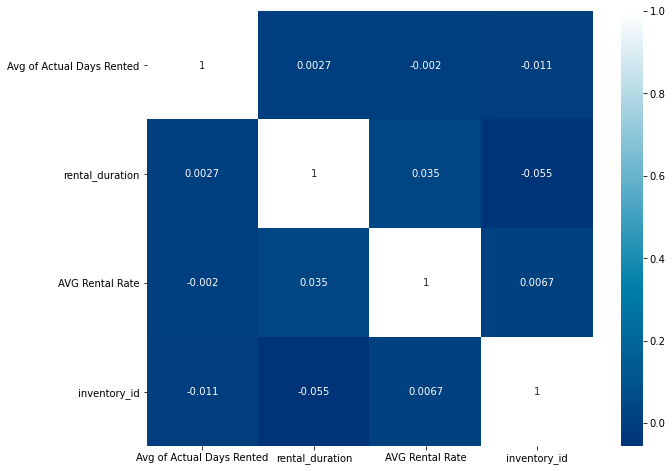

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,
           cmap='ocean',
           center=0,
           annot=True,
           );